In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns #시각화 라이브러리

In [2]:
sur =pd.read_csv('SampleSubmission.csv')
train=pd.read_csv('train1.csv')
test =pd.read_csv('test1.csv')

In [3]:
train.set_index('ID', inplace=True)
test.set_index('ID', inplace=True)

### 결측치 채우기

In [4]:
#결측치 랜덤으로 차례차례 넣기 함수
def fill_fare(data):

    if np.isnan(data["Prior_purchases"]):
        return (np.random.randint(7,18))
    else:
        return data["Prior_purchases"]
    
train['Prior_purchases'] = train.apply(fill_fare, axis=1).astype(int)
test['Prior_purchases'] = test.apply(fill_fare, axis=1).astype(int)

In [5]:
def fill_fare(data):

    if np.isnan(data["Customer_care_calls"]):
        return (np.random.randint(3,5))
    else:
        return data["Customer_care_calls"]
#Customer_care_calls 평균-+ 분산 값 랜덤 대입
train['Customer_care_calls'] = train.apply(fill_fare, axis=1)
test['Customer_care_calls'] = test.apply(fill_fare, axis=1)

In [6]:
def fill_fare(data):

    if np.isnan(data["Discount_offered"]):
        return (np.random.randint(1,9))
    else:
        return data["Discount_offered"]
train['Discount_offered'] = train.apply(fill_fare, axis=1)
test['Discount_offered'] = test.apply(fill_fare, axis=1)

In [7]:
a =[0,1,2,3,4,5,6,7,8,9,10,100]
b = [0,1,2,3,4,5,6,7,8,9,10]
test['Discount_offered']=pd.cut(test['Discount_offered'],bins=a, labels =b )

In [8]:
a =[0,1,2,3,4,5,6,7,8,9,10,100]
b = [0,1,2,3,4,5,6,7,8,9,10]
train['Discount_offered']=pd.cut(train['Discount_offered'],bins=a, labels =b )

In [13]:
train['Discount_offered'] = train.apply(fill_fare, axis=1)

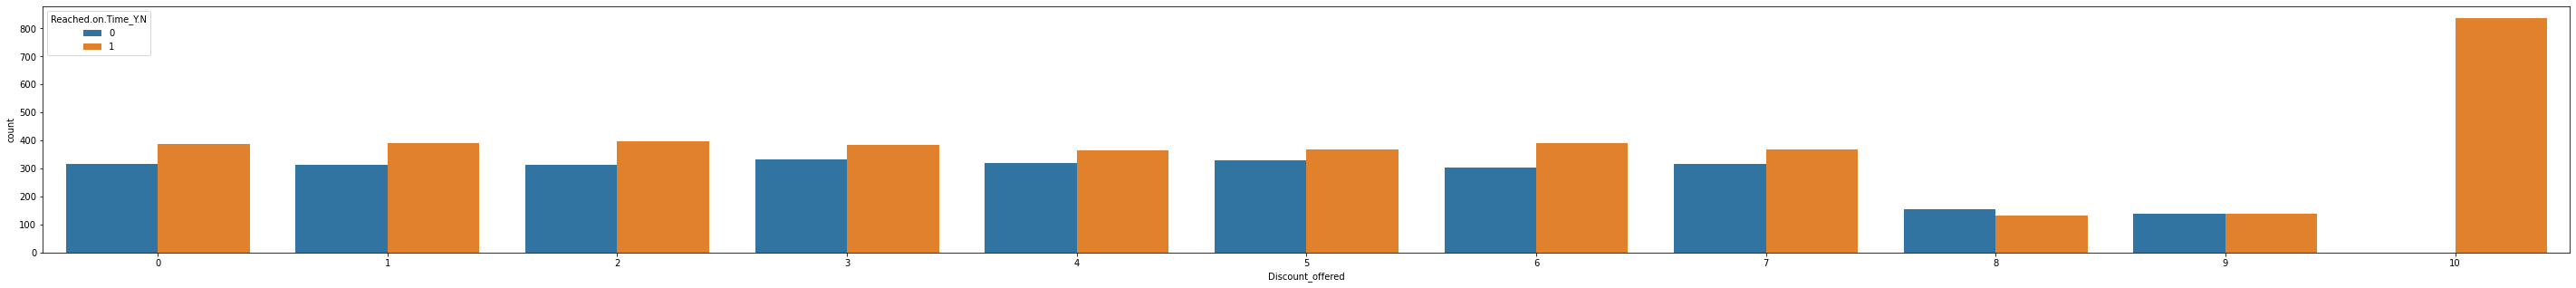

In [15]:
plt.figure(figsize = (50,5))
d =sns.countplot(data = train,    #사용할데이터
             x= 'Discount_offered',      # X축으로 사용할 컬럼
             hue= 'Reached.on.Time_Y.N')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   int32  
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     6999 non-null   int64  
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 948.8+ KB


## 이상치 제거

In [16]:
train['Mode_of_Shipment'].unique()

array([' Ship', ' Flight', ' Road', '?', ' Shipzk', ' Flightzk',
       ' Roadzk'], dtype=object)

In [17]:
train['Mode_of_Shipment'] =train['Mode_of_Shipment'].replace(' Roadzk',' Road')
test['Mode_of_Shipment'] =test['Mode_of_Shipment'].replace(' Roadzk',' Road')

In [18]:
train['Mode_of_Shipment'] =train['Mode_of_Shipment'].replace(' Shipzk',' Ship')
test['Mode_of_Shipment'] =test['Mode_of_Shipment'].replace(' Shipzk',' Ship')

In [19]:
train['Mode_of_Shipment'] =train['Mode_of_Shipment'].replace(' Flightzk',' Flight')
test['Mode_of_Shipment'] =test['Mode_of_Shipment'].replace(' Flightzk','  Flight')

In [20]:
train['Mode_of_Shipment'] =train['Mode_of_Shipment'].replace('?',' Ship')
test['Mode_of_Shipment'] =test['Mode_of_Shipment'].replace('?',' Ship')

In [21]:
train['Mode_of_Shipment'] =train['Mode_of_Shipment'].replace(' Ship','Ship')
test['Mode_of_Shipment'] =test['Mode_of_Shipment'].replace(' Ship','Ship')

In [22]:
train['Mode_of_Shipment'] =train['Mode_of_Shipment'].replace(' Flight','Flight')
test['Mode_of_Shipment'] =test['Mode_of_Shipment'].replace(' Flight','Flight')

In [23]:
train['Mode_of_Shipment'] =train['Mode_of_Shipment'].replace(' Road','Road')
test['Mode_of_Shipment'] =test['Mode_of_Shipment'].replace(' Road','Road')

In [24]:
train['Mode_of_Shipment'].value_counts()

Ship      4883
Road      1076
Flight    1040
Name: Mode_of_Shipment, dtype: int64

In [25]:
train['Product_importance'] =train['Product_importance'].replace('highh','high')
test['Product_importance'] =test['Product_importance'].replace('highh','high')

In [26]:
train['Product_importance'] =train['Product_importance'].replace('?','low')
test['Product_importance'] =test['Product_importance'].replace('?','low')

In [27]:
train['Product_importance'] =train['Product_importance'].replace('loww','low')
test['Product_importance'] =test['Product_importance'].replace('loww','low')

In [28]:
train['Product_importance'] =train['Product_importance'].replace('mediumm','medium')
test['Product_importance'] =test['Product_importance'].replace('mediumm','medium')

In [29]:
train['Product_importance'].value_counts()

low       3442
medium    2983
high       574
Name: Product_importance, dtype: int64

In [30]:
train['Customer_rating'] =train['Customer_rating'].replace(99,3)
test['Customer_rating'] =test['Customer_rating'].replace(99,3)

In [31]:
train['Customer_rating'].value_counts()

3    1453
2    1399
5    1399
1    1391
4    1357
Name: Customer_rating, dtype: int64

In [32]:
def fill_fare(data):

    if data["Weight_in_gms"]==1:
        return (np.random.randint(1000,5000))
    else:
        return data["Weight_in_gms"]

In [33]:
train['Weight_in_gms'].value_counts()

?       446
1817      8
1367      8
4343      7
4195      7
       ... 
2782      1
3443      1
3981      1
6064      1
5420      1
Name: Weight_in_gms, Length: 3332, dtype: int64

In [34]:
train['Weight_in_gms'] =train['Weight_in_gms'].replace('?',1)
test['Weight_in_gms'] =test['Weight_in_gms'].replace('?',1)

In [35]:
train['Weight_in_gms']=train['Weight_in_gms'].astype(int)
test['Weight_in_gms']=test['Weight_in_gms'].astype(int)

In [36]:
train['Weight_in_gms'] = train.apply(fill_fare, axis=1).astype(int)
test['Weight_in_gms'] = test.apply(fill_fare, axis=1).astype(int)

In [37]:
a =[0,1000,2000,3000,4000,5000,10000]
b = ['a','b','c','d','e','f']
test['Weight_in_gms']=pd.cut(test['Weight_in_gms'],bins=a, labels =b )

In [38]:
a =[0,1000,2000,3000,4000,5000,10000]
b = ['a','b','c','d','e','f']
train['Weight_in_gms']=pd.cut(train['Weight_in_gms'],bins=a, labels =b )

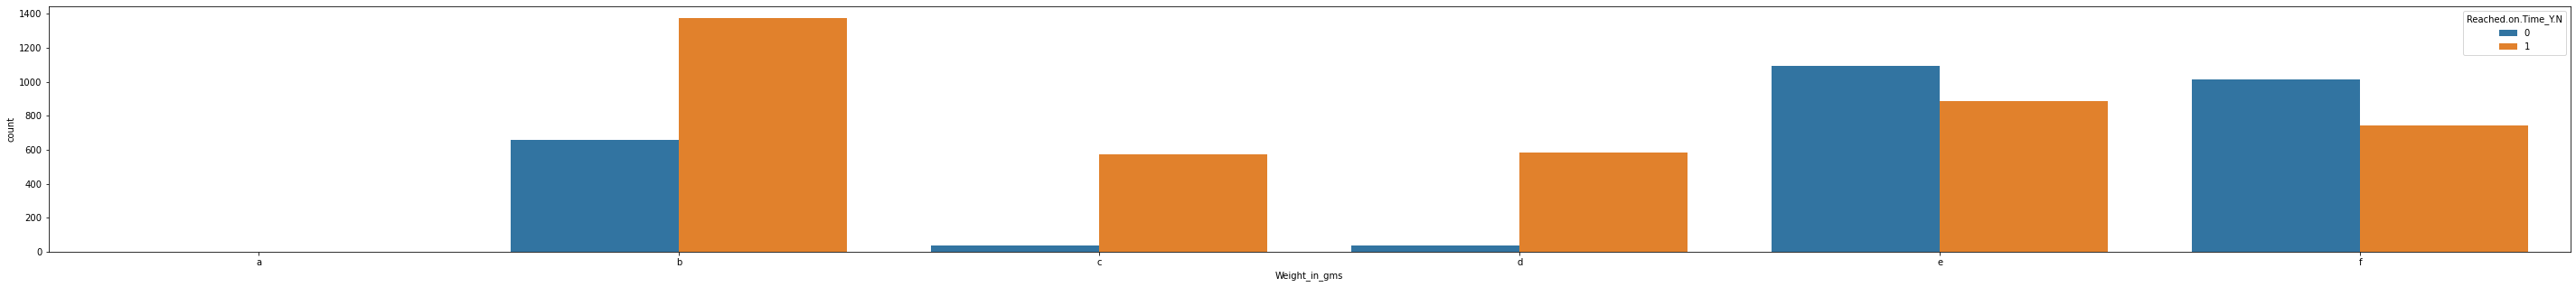

In [39]:
plt.figure(figsize = (50,5))
d =sns.countplot(data = train,    #사용할데이터
             x= 'Weight_in_gms',      # X축으로 사용할 컬럼
             hue= 'Reached.on.Time_Y.N')

In [40]:
onehot_column = ['Warehouse_block ','Mode_of_Shipment','Product_importance','Weight_in_gms','Gender','Discount_offered']

In [41]:
#train one_hot인코딩
for col in onehot_column:
    #원핫 인코딩한 컬럼 변수에 저장
    dummy = pd.get_dummies(train[col],prefix = col)
    
    #원핫 인코딩된 결과물을 기존의 자료와 합치기 
    train = pd.concat([train,dummy], axis=1)
    
    #글자형컬럼(원핫인코딩 진행한)삭제
    train.drop(col,axis=1, inplace = True)

In [42]:
#test one_hot인코딩
for col in onehot_column:
    #원핫 인코딩한 컬럼 변수에 저장
    dummy = pd.get_dummies(test[col],prefix = col)
    
    #원핫 인코딩된 결과물을 기존의 자료와 합치기 
    test = pd.concat([test,dummy], axis=1)
    
    #글자형컬럼(원핫인코딩 진행한)삭제
    test.drop(col,axis=1, inplace = True)

In [43]:
print(train.shape)
print(test.shape)

(6999, 35)
(4000, 34)


In [44]:
set(train.columns) -set(test.columns)

{'Reached.on.Time_Y.N'}

In [45]:
set(test.columns)-set(train.columns)

set()

In [60]:
############################################# 전처리 끝 ###############################

###  모델선택

In [46]:
X_train = train.drop('Reached.on.Time_Y.N' , axis=1)
y_train = train['Reached.on.Time_Y.N']
X_test = test.copy()

In [47]:
from xgboost import XGBClassifier
xgb= XGBClassifier(n_estimators=100,eval_metric='mlogloss')
xgb = xgb.fit(X_train,y_train)


C:\Users\SM2120\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [48]:
xgb.score(X_train,y_train)

0.9064152021717388

In [99]:
pre = xgb.predict(X_test)
result = pd.read_csv('SampleSubmission.csv')
result['Reached.on.Time_Y.N'] = pre
result.to_csv('our4.4.csv', index = False)

###  랜덤포레스트


In [65]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000,       #트리의 갯수
                                      max_features=0.7,  #각각의 트리에서 사용할 특성의 개수
                                      max_depth=5,       # 깊이
                                      min_samples_leaf=15,#나뭇잎개수
                                      max_leaf_nodes=50) #맥스리프노드

In [66]:
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=0.7, max_leaf_nodes=50,
                       min_samples_leaf=15, n_estimators=1000)

In [1]:
forest.score(X_test,y_test)

NameError: name 'forest' is not defined

In [68]:
pre = forest.predict(X_test)
result = pd.read_csv('SampleSubmission.csv')
result['Reached.on.Time_Y.N'] = pre
result.to_csv('our.csv', index = False)

In [64]:
# 최적의 파라미터
print('최적의 파라미터 : ',grid.best_params_)
# 최적의 예측점수
print('최고 예측 점수 : ',grid.best_score_)

최적의 파라미터 :  {'max_depth': 10, 'max_features': 0.7, 'max_leaf_nodes': 20, 'min_samples_leaf': 15, 'n_estimators': 1000}
최고 예측 점수 :  0.6668095442206029


In [83]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)

AdaBoostClassifier()

In [60]:
pre = adaboost.predict(X_test)
result = pd.read_csv('SampleSubmission.csv')
result['Reached.on.Time_Y.N'] = pre
result.to_csv('our4.1.csv', index = False)

NameError: name 'adaboost' is not defined

In [86]:
adaboost.score(X_train,y_train)

0.6625232176025146

### 데이터 스케일링 
- 특성들의 범위를 정규화
- 특성마다 다른범위를 가지는 경우 머신러닝 모델들이 제대로 학습되지 않을 가능성이 있다.

In [68]:
!pip install xgboost

In [53]:
from xgboost import XGBClassifier

In [58]:
xgb= XGBClassifier(n_estimators=100,eval_metric='mlogloss')
xgb = xgb.fit(X_train,y_train)

In [59]:
xgb.score(X_train,y_train)

0.9009858551221603

In [68]:
pre = xgb.predict(X_test)
result = pd.read_csv('SampleSubmission.csv')
result['Reached.on.Time_Y.N'] = pre
result.to_csv('our4.1.csv', index = False)

In [69]:
from sklearn.metrics import accuracy_score

In [111]:
accuracy_score(X_train,y_train)

NameError: name 'accuracy_score' is not defined